# Importing all the necessary libraries

In [33]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

In [35]:
import keras
import os
import cv2
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
from keras.optimizers import Adam,RMSprop,Nadam,SGD

In [3]:
import cv2
import numpy as np
import os
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
from os import listdir

In [14]:
folder_path = 'C:/assignment 4/Train/jeans/' # our folder path containing some images

In [15]:
images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))] # loop on all files of the folder and build a list of files paths

In [17]:
len(listdir(folder_path))

80

# Augmentiing the images of training folder

In [18]:
for i in images:
    img = cv2.imread(str(i))
    height,width=img.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),30,.75)
    rotation_matrixn = cv2.getRotationMatrix2D((width/2,height/2),-30,.75)
    ratated_image = cv2.warpAffine(img,rotation_matrix,(width,height))
    rotated_imagen = cv2.warpAffine(img,rotation_matrixn,(width,height))
    flip=cv2.flip(img,-1)
    M=np.ones(img.shape,dtype='uint8')*75
    added=cv2.add(img,M)
    substracted=cv2.subtract(img,M)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened=cv2.filter2D(img,-1,kernel)
    
    
    cv2.imwrite(i+'Augmented 30.jpeg',ratated_image)
    cv2.imwrite(i+'Augmented_30.jpeg',rotated_imagen)
    cv2.imwrite(i+'Flipped.jpeg',flip)
    cv2.imwrite(i+'high.jpeg',added)
    cv2.imwrite(i+'low.jpeg',substracted)
    cv2.imwrite(i+'ImageSharpening.jpeg',sharpened)
    
print("Augumentation of training folder Trouser is completed")
len(listdir(folder_place))
    

    

Augumentation of training folder Trouser is completed


560

In [9]:
folder_place = 'C:/assignment 4/Train/trousers/'

In [10]:
image = [os.path.join(folder_place, f) for f in os.listdir(folder_place) if os.path.isfile(os.path.join(folder_place, f))]

In [12]:
len(listdir(folder_place))

80

In [13]:
for i in image:
    imgT = cv2.imread(str(i))
    height,width=imgT.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((width/2,height/2),30,.75)
    rotation_matrixn = cv2.getRotationMatrix2D((width/2,height/2),-30,.75)
    ratated_image = cv2.warpAffine(imgT,rotation_matrix,(width,height))
    rotated_imagen = cv2.warpAffine(imgT,rotation_matrixn,(width,height))
    flip=cv2.flip(imgT,-1)
    M=np.ones(imgT.shape,dtype='uint8')*75
    added=cv2.add(imgT,M)
    substracted=cv2.subtract(imgT,M)
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened=cv2.filter2D(imgT,-1,kernel)
    
    
    cv2.imwrite(i+'Augmented 30.jpeg',ratated_image)
    cv2.imwrite(i+'Augmented_30.jpeg',rotated_imagen)
    cv2.imwrite(i+'Flipped.jpeg',flip)
    cv2.imwrite(i+'high.jpeg',added)
    cv2.imwrite(i+'low.jpeg',substracted)
    cv2.imwrite(i+'ImageSharpening.jpeg',sharpened)

print("Augumentation of training folder Trouser is completed")
len(listdir(folder_place))
    


Augumentation of training folder Trouser is completed


560

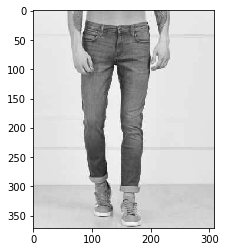

The matrix of image is : [[236 236 236 ... 232 232 232]
 [236 236 236 ... 232 232 232]
 [236 236 236 ... 232 232 232]
 ...
 [222 221 219 ... 214 214 214]
 [222 221 219 ... 214 214 214]
 [222 221 219 ... 214 214 214]]
The shape of image is:  (371, 309)


In [43]:
DATADIR="C:/assignment 4/Train/"
CATEGORIES=["jeans","trousers"]
for category in CATEGORIES:
    path=os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray" )
        plt.show()
        break
    break
print("The matrix of image is :",img_array)

print("The shape of image is: ", img_array.shape)

In [8]:
img_width, img_height = 224, 224
Train_dir = 'C:/assignment 4/Train'
validation_dir = 'C:/assignment 4/Test'
nb_train_samples = 1120
nb_validation_samples = 60
epochs = 20
batch_size = 16

In [9]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height) 
else: 
    input_shape = (img_width, img_height, 3) 

In [10]:
from keras.preprocessing.image import ImageDataGenerator 
train_datagen = ImageDataGenerator(rescale = 1. / 255) 
test_datagen = ImageDataGenerator(rescale = 1. / 255) 

In [11]:
train_generator = train_datagen.flow_from_directory(Train_dir, 
                              target_size =(img_width, img_height), 
                     batch_size = batch_size, class_mode ='binary') 
  

Found 1120 images belonging to 2 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory( 
                                    validation_dir, 
                   target_size =(img_width, img_height), 
          batch_size = batch_size, class_mode ='binary') 

Found 60 images belonging to 2 classes.


In [13]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 223, 223, 32)      416       
_________________________________________________________________
activation_1 (Activation)    (None, 223, 223, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_2 (Activation)    (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 110, 110, 32)     

# OPTIMIZERS

# 1. ADAM

In [49]:
checkpoint=ModelCheckpoint(r'C:\Users\ankit\Documents\modelcheckpoint.h5',
                          monitor="val_loss",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_loss",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
             optimizer=Adam(learning_rate=0.01),
             metrics=['accuracy'])

In [50]:
model_save = model.fit_generator(train_generator, 
        steps_per_epoch = nb_train_samples // batch_size, 
        epochs = epochs, validation_data = validation_generator, 
        callbacks=callbacks,                         
        validation_steps = nb_validation_samples // batch_size) 
  

Epoch 1/20
70/70 [==============================] - 160s 2s/step - loss: 0.6770 - accuracy: 0.5857 - val_loss: 0.7095 - val_accuracy: 0.5000

Epoch 00001: val_loss improved from inf to 0.70954, saving model to C:\Users\ankit\Documents\modelcheckpoint.h5
Epoch 2/20
70/70 [==============================] - 148s 2s/step - loss: 0.5682 - accuracy: 0.6964 - val_loss: 0.9112 - val_accuracy: 0.6364

Epoch 00002: val_loss did not improve from 0.70954
Epoch 3/20
70/70 [==============================] - 148s 2s/step - loss: 0.4957 - accuracy: 0.7545 - val_loss: 0.6487 - val_accuracy: 0.5000

Epoch 00003: val_loss improved from 0.70954 to 0.64870, saving model to C:\Users\ankit\Documents\modelcheckpoint.h5
Epoch 4/20
70/70 [==============================] - 135s 2s/step - loss: 0.4163 - accuracy: 0.7955 - val_loss: 0.6383 - val_accuracy: 0.5682

Epoch 00004: val_loss improved from 0.64870 to 0.63830, saving model to C:\Users\ankit\Documents\modelcheckpoint.h5
Epoch 5/20
70/70 [===================

# 2. NADAM

In [51]:
checkpoint=ModelCheckpoint(r'C:\Users\ankit\Documents\modelcheckpoint\MODEL2.h5',
                          monitor="val_loss",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_loss",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
             optimizer=Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
             metrics=['accuracy'])

In [52]:
model_SAVE2 = model.fit_generator(train_generator, 
        steps_per_epoch = nb_train_samples // batch_size, 
        epochs = epochs, validation_data = validation_generator, 
        callbacks=callbacks,                         
        validation_steps = nb_validation_samples // batch_size) 

Epoch 1/20
70/70 [==============================] - 156s 2s/step - loss: 0.2845 - accuracy: 0.8696 - val_loss: 1.0988 - val_accuracy: 0.6458

Epoch 00001: val_loss improved from inf to 1.09882, saving model to C:\Users\ankit\Documents\modelcheckpoint\MODEL2.h5
Epoch 2/20
70/70 [==============================] - 136s 2s/step - loss: 0.2732 - accuracy: 0.8839 - val_loss: 0.4888 - val_accuracy: 0.7045

Epoch 00002: val_loss improved from 1.09882 to 0.48879, saving model to C:\Users\ankit\Documents\modelcheckpoint\MODEL2.h5
Epoch 3/20
70/70 [==============================] - 132s 2s/step - loss: 0.2213 - accuracy: 0.9062 - val_loss: 1.5464 - val_accuracy: 0.6591

Epoch 00003: val_loss did not improve from 0.48879
Epoch 4/20
70/70 [==============================] - 133s 2s/step - loss: 0.2074 - accuracy: 0.9170 - val_loss: 0.4996 - val_accuracy: 0.6818

Epoch 00004: val_loss did not improve from 0.48879
Epoch 5/20
70/70 [==============================] - 132s 2s/step - loss: 0.1911 - accura

# 3 SGD+MOMENTUM

In [14]:
checkpoint=ModelCheckpoint(r'C:\Users\ankit\Documents\modelcheckpoint\MODEL3.h5',
                          monitor="val_loss",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_loss",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
              optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=False),
              metrics=['accuracy'])
              

In [19]:
model_SAVE3 = model.fit_generator(train_generator, 
        steps_per_epoch = nb_train_samples // batch_size, 
        epochs = epochs,
        validation_data = validation_generator, 
        callbacks=callbacks,
        verbose=1,
        validation_steps = nb_validation_samples // batch_size) 




Epoch 1/20
70/70 [==============================] - 92s 1s/step - loss: 0.2283 - accuracy: 0.9170 - val_loss: 0.7592 - val_accuracy: 0.7083

Epoch 00001: val_loss did not improve from 0.47155
Epoch 2/20
70/70 [==============================] - 90s 1s/step - loss: 0.2201 - accuracy: 0.9107 - val_loss: 0.6353 - val_accuracy: 0.6364

Epoch 00002: val_loss did not improve from 0.47155
Epoch 3/20
70/70 [==============================] - 89s 1s/step - loss: 0.1964 - accuracy: 0.9170 - val_loss: 0.6389 - val_accuracy: 0.7727

Epoch 00003: val_loss did not improve from 0.47155
Epoch 4/20
70/70 [==============================] - 88s 1s/step - loss: 0.2026 - accuracy: 0.9223 - val_loss: 0.3220 - val_accuracy: 0.7727

Epoch 00004: val_loss improved from 0.47155 to 0.32198, saving model to C:\Users\ankit\Documents\modelcheckpoint\MODEL3.h5
Epoch 5/20
70/70 [==============================] - 88s 1s/step - loss: 0.1842 - accuracy: 0.9205 - val_loss: 0.6236 - val_accuracy: 0.7500

Epoch 00005: val_lo

# 4.RMSPROP

In [25]:
checkpoint=ModelCheckpoint(r'C:\Users\ankit\Documents\modelcheckpoint\MODEL4\.h5',
                          monitor="val_loss",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_loss",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]


In [30]:
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001, rho=0.9),
              metrics=['accuracy'])

In [31]:
model_SAVE4 = model.fit_generator(train_generator, 
        steps_per_epoch = nb_train_samples // batch_size, 
        epochs = epochs,
        validation_data = validation_generator, 
        callbacks=callbacks,
        verbose=1,
        validation_steps = nb_validation_samples // batch_size) 

Epoch 1/20
70/70 [==============================] - 110s 2s/step - loss: 1.0034 - accuracy: 0.7911 - val_loss: 0.5153 - val_accuracy: 0.7708

Epoch 00001: val_loss improved from inf to 0.51525, saving model to C:\Users\ankit\Documents\modelcheckpoint\MODEL4\.h5
Epoch 2/20
70/70 [==============================] - 102s 1s/step - loss: 0.3033 - accuracy: 0.8777 - val_loss: 0.7355 - val_accuracy: 0.6591

Epoch 00002: val_loss did not improve from 0.51525
Epoch 3/20
70/70 [==============================] - 103s 1s/step - loss: 0.2371 - accuracy: 0.9018 - val_loss: 0.5751 - val_accuracy: 0.7727

Epoch 00003: val_loss did not improve from 0.51525
Epoch 4/20
70/70 [==============================] - 101s 1s/step - loss: 0.1726 - accuracy: 0.9339 - val_loss: 0.5939 - val_accuracy: 0.7500
Restoring model weights from the end of the best epoch

Epoch 00004: val_loss did not improve from 0.51525

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
Epoch 00004: early sto

# 4.Nesterov Accelerated Gradient Descent

In [36]:
checkpoint=ModelCheckpoint(r'C:\Users\ankit\Documents\modelcheckpoint\MODEL5\.h5',
                          monitor="val_loss",
                          save_best_only=True,
                          verbose=1)

earlystop=EarlyStopping(monitor="val_loss",
                       min_delta=0,
                       patience=3,
                       verbose=1,
                       restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",
                           factor=0.2,
                           patience=3,
                           verbose=1,
                           min_delta=0.0001)

callbacks=[earlystop,checkpoint,reduce_lr]

model.compile(loss='binary_crossentropy',
              optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
              metrics=['accuracy'])


In [37]:
model_SAVE5= model.fit_generator(train_generator, 
        steps_per_epoch = nb_train_samples // batch_size, 
        epochs = epochs,
        validation_data = validation_generator, 
        callbacks=callbacks,
        verbose=1,
        validation_steps = nb_validation_samples // batch_size) 




Epoch 1/20
70/70 [==============================] - 178s 3s/step - loss: 0.3096 - accuracy: 0.8687 - val_loss: 0.4090 - val_accuracy: 0.7500

Epoch 00001: val_loss improved from inf to 0.40898, saving model to C:\Users\ankit\Documents\modelcheckpoint\MODEL5\.h5
Epoch 2/20
70/70 [==============================] - 135s 2s/step - loss: 0.2404 - accuracy: 0.8920 - val_loss: 0.5026 - val_accuracy: 0.7273

Epoch 00002: val_loss did not improve from 0.40898
Epoch 3/20
70/70 [==============================] - 133s 2s/step - loss: 0.1875 - accuracy: 0.9286 - val_loss: 0.8922 - val_accuracy: 0.6364

Epoch 00003: val_loss did not improve from 0.40898
Epoch 4/20
70/70 [==============================] - 132s 2s/step - loss: 0.1782 - accuracy: 0.9187 - val_loss: 0.6108 - val_accuracy: 0.7273
Restoring model weights from the end of the best epoch

Epoch 00004: val_loss did not improve from 0.40898

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Epoch 00004: early stop

# After building models using different optimizers, I conclude that for my data SGD+MOMENTUM optimizer performed best with the validation accuracy of .77 and least validation loss of .32

In [38]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()


16
0
0.0


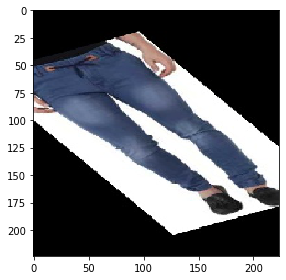

1
0.0


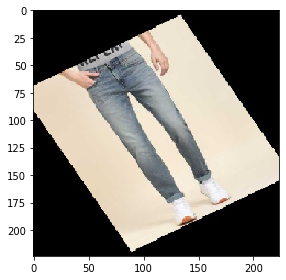

2
1.0


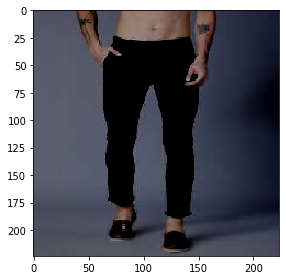

3
0.0


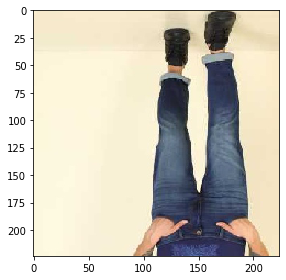

4
0.0


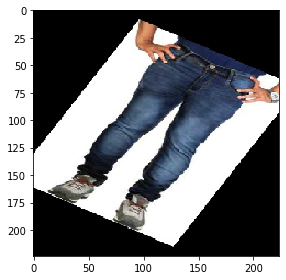

5
1.0


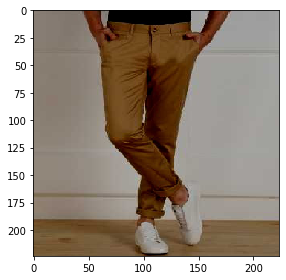

6
1.0


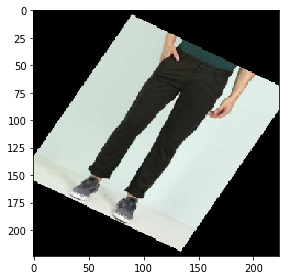

7
0.0


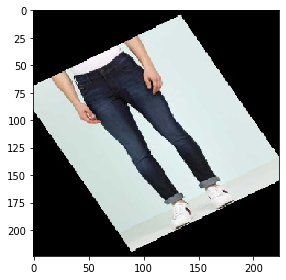

8
0.0


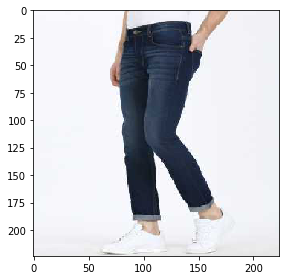

9
0.0


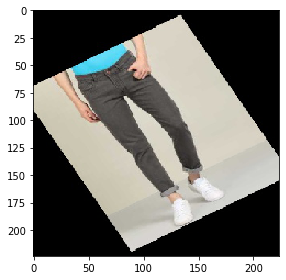

10
0.0


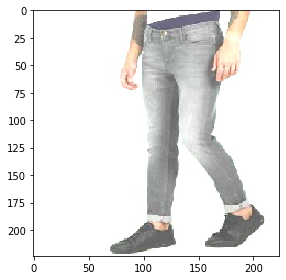

11
0.0


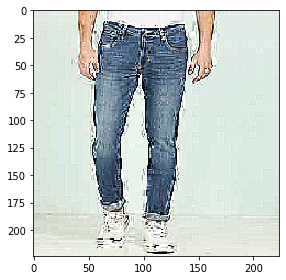

12
0.0


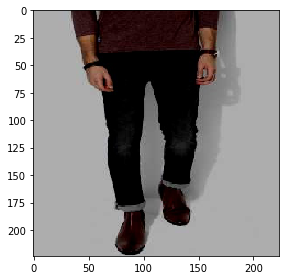

13
1.0


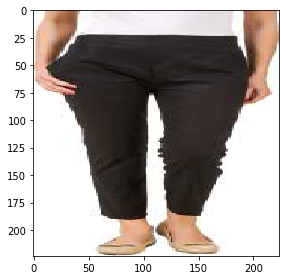

14
0.0


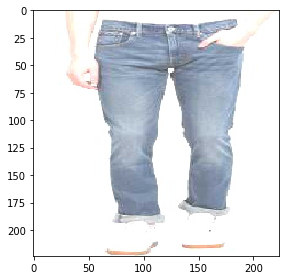

15
0.0


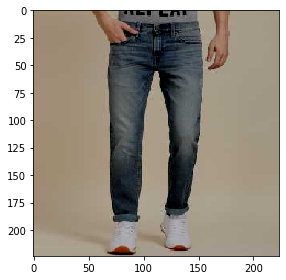

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
image_batch,label_batch = train_generator.next()
#print(image_batch)
print(len(image_batch))
for i in range(0,len(image_batch)):
    print(i)
    image = image_batch[i]
    print(label_batch[i])
    imshow(image)

In [41]:
from os import listdir
from os.path import isfile, join
predict_dir_path='C:/assignment 4/Test_perdict/'
output_files = [f for f in listdir(predict_dir_path) if isfile(join(predict_dir_path, f))]
print(output_files)


['img_532 (2).jpeg', 'img_532.jpeg', 'img_533 (2).jpeg', 'img_533.jpeg', 'img_534 (2).jpeg', 'img_534.jpeg', 'img_535 (2).jpeg', 'img_535.jpeg', 'img_536 (2).jpeg', 'img_536.jpeg', 'img_537 (2).jpeg', 'img_537.jpeg', 'img_538 (2).jpeg', 'img_538.jpeg', 'img_539 (2).jpeg', 'img_539.jpeg']


In [67]:
from keras.models import load_model
modelnew=load_model('MODEL3.h5')

In [52]:
print(os.getcwd())

C:\Users\ankit


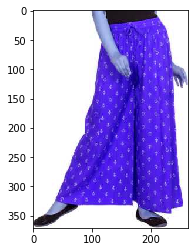

img_532 (2).jpeg: trouser


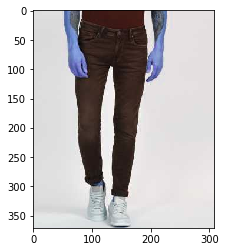

img_532.jpeg: jeans


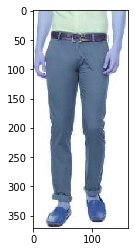

img_533 (2).jpeg: trouser


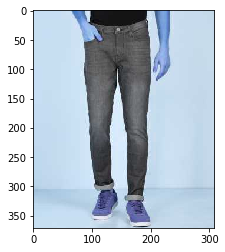

img_533.jpeg: trouser


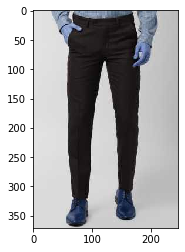

img_534 (2).jpeg: trouser


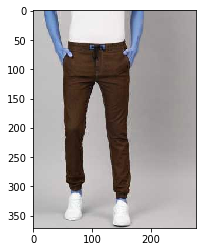

img_534.jpeg: trouser


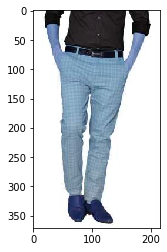

img_535 (2).jpeg: trouser


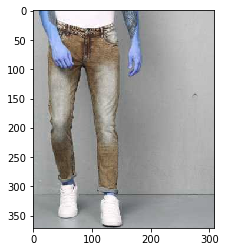

img_535.jpeg: jeans


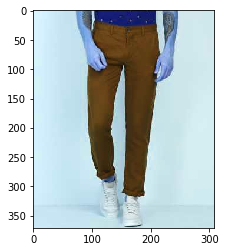

img_536 (2).jpeg: jeans


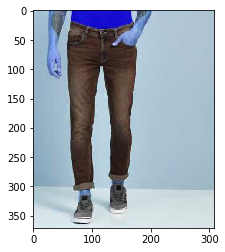

img_536.jpeg: trouser


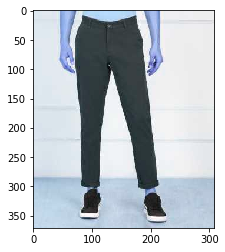

img_537 (2).jpeg: jeans


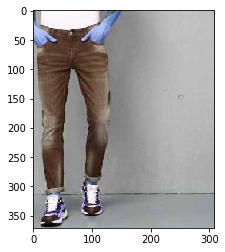

img_537.jpeg: trouser


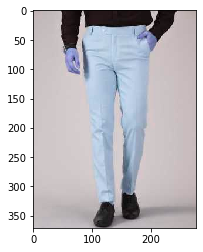

img_538 (2).jpeg: jeans


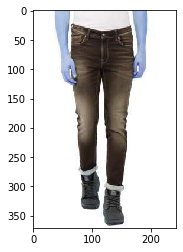

img_538.jpeg: jeans


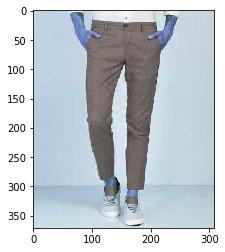

img_539 (2).jpeg: trouser


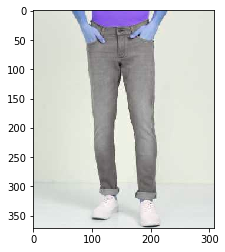

img_539.jpeg: jeans
Total trousers : 9
Total jeans : 7


In [82]:
import numpy as np
from keras.preprocessing import image
jean_counter = 0 
trouser_counter  = 0
for file in output_files:
    img = image.load_img(predict_dir_path+file, target_size=(img_width, img_height))
    #imagesshow = cv2.imread(predict_dir_path+file)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    img_array=cv2.imread(predict_dir_path+file)
    plt.imshow(img_array )
    plt.show()
    images = np.vstack([x])
    classes = modelnew.predict_classes(images, batch_size=10)
    classes = classes[0][0]
    
    if classes == 1:
        print(file + ": " + 'trouser')
        trouser_counter += 1
        
    else:
        print(file + ": " + 'jeans')
        jean_counter += 1
        
print("Total trousers :", trouser_counter)
print("Total jeans :",jean_counter)